# Trabalho Prático - Projeto e Análise de Algoritmos

## Testes

Instalando requisitos

In [30]:
%pip install pandas
%pip install matplotlib
%pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import subprocess
import pandas
import numpy
import matplotlib
import matplotlib.pyplot
import seaborn

Definindo variáveis

In [32]:
distancias_minimas=[0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
algoritmos=['forca-bruta', 'branch-and-bound']
entradas = [
    [1, 1, '1_franquias_1_lojas.txt'],
    [1, 2, '1_franquias_2_lojas.txt'],
    [1, 3, '1_franquias_3_lojas.txt'],
    [2, 2, '2_franquias_2_lojas.txt'],
    [1, 5, '1_franquias_5_lojas.txt'],
    [1, 6, '1_franquias_6_lojas.txt'],
    [1, 7, '1_franquias_7_lojas.txt'],
    [1, 8, '1_franquias_8_lojas.txt'],
    [3, 3, '3_franquias_3_lojas.txt'],
    [2, 5, '2_franquias_5_lojas.txt'],
    [5, 2, '5_franquias_2_lojas.txt'],
    [_, _, 'exemplo_professor.txt']
    ]

Executando o programa e salvando a saida

In [33]:
dados = []
for _ in range(3):
    for entrada in entradas:
        for distancia_minima in distancias_minimas:
            for algoritmo in algoritmos:
                saida = subprocess.run(['java -jar app.jar --calcular-tempo --arquivo-dados {} --distancia-minima {} --algoritmo {}'.format(entrada[2], distancia_minima, algoritmo)], shell=True, capture_output=True, text=True)
                algoritmo = 'Força Bruta' if algoritmo == 'forca-bruta' else 'Branch and Bound'
                dados.append([entrada[0], entrada[1], distancia_minima, algoritmo, saida.stdout.replace('\n', '').replace('ns', ''), entrada[2]])

Criando um pandas data frame

In [34]:
legenda = ['Número de Franquias', 'Número de Lojas por franquia', 'Distância Mínima', 'Algoritmo', 'Tempo de Execução', 'Arquivo de Dados']

In [35]:
dados = pandas.DataFrame(dados, columns=legenda)

In [36]:
dados

,Número de Franquias,Número de Lojas por franquia,Distância Mínima,Algoritmo,Tempo de Execução,Arquivo de Dados
0,1,1,0,Força Bruta,564102,1_franquias_1_lojas.txt
1,1,1,0,Branch and Bound,499638,1_franquias_1_lojas.txt
2,1,1,1,Força Bruta,493376,1_franquias_1_lojas.txt
3,1,1,1,Branch and Bound,480911,1_franquias_1_lojas.txt
4,1,1,2,Força Bruta,483909,1_franquias_1_lojas.txt
...,...,...,...,...,...,...
859,2,2,256,Branch and Bound,9063888,exemplo_professor.txt
860,2,2,512,Força Bruta,907656606,exemplo_professor.txt
861,2,2,512,Branch and Bound,11717652,exemplo_professor.txt
862,2,2,1024,Força Bruta,973556369,exemplo_professor.txt


Exportando dados

In [37]:
dados.to_csv('dados.csv', index=False)

In [38]:
dados

,Número de Franquias,Número de Lojas por franquia,Distância Mínima,Algoritmo,Tempo de Execução,Arquivo de Dados
0,1,1,0,Força Bruta,564102,1_franquias_1_lojas.txt
1,1,1,0,Branch and Bound,499638,1_franquias_1_lojas.txt
2,1,1,1,Força Bruta,493376,1_franquias_1_lojas.txt
3,1,1,1,Branch and Bound,480911,1_franquias_1_lojas.txt
4,1,1,2,Força Bruta,483909,1_franquias_1_lojas.txt
...,...,...,...,...,...,...
859,2,2,256,Branch and Bound,9063888,exemplo_professor.txt
860,2,2,512,Força Bruta,907656606,exemplo_professor.txt
861,2,2,512,Branch and Bound,11717652,exemplo_professor.txt
862,2,2,1024,Força Bruta,973556369,exemplo_professor.txt


Gerando gráficos

In [39]:
dados_media = {}
for index, row in dados.iterrows():
    if not (row['Algoritmo'], row['Distância Mínima']) in dados_media:
        dados_media.setdefault((row['Algoritmo'], row['Distância Mínima']), 0)
    else:
        dados_media[(row['Algoritmo'], row['Distância Mínima'])] += int(row['Tempo de Execução'])

dados_media

{('Força Bruta', 0): 24421094,
 ('Branch and Bound', 0): 24102481,
 ('Força Bruta', 1): 23419957,
 ('Branch and Bound', 1): 22804308,
 ('Força Bruta', 2): 23200585,
 ('Branch and Bound', 2): 23380727,
 ('Força Bruta', 4): 23633981,
 ('Branch and Bound', 4): 23837440,
 ('Força Bruta', 8): 22509257,
 ('Branch and Bound', 8): 24617858,
 ('Força Bruta', 16): 23706195,
 ('Branch and Bound', 16): 24614915,
 ('Força Bruta', 32): 25530667,
 ('Branch and Bound', 32): 62853286,
 ('Força Bruta', 64): 45710329,
 ('Branch and Bound', 64): 60792301,
 ('Força Bruta', 128): 369361020,
 ('Branch and Bound', 128): 101724199,
 ('Força Bruta', 256): 1713042567,
 ('Branch and Bound', 256): 174186214,
 ('Força Bruta', 512): 4158757481,
 ('Branch and Bound', 512): 179001215,
 ('Força Bruta', 1024): 7960772987,
 ('Branch and Bound', 1024): 172880286}

In [40]:
dados_grafico = {
    'Algoritmo': [],
    'Distância Mínima': [],
    'Tempo de Execução': []
}

for key, value in dados_media.items():
    algoritmo, distancia_minima = key
    tempo_execucao = value / 3
    dados_grafico['Algoritmo'].append(algoritmo)
    dados_grafico['Distância Mínima'].append(distancia_minima)
    dados_grafico['Tempo de Execução'].append(tempo_execucao)
    

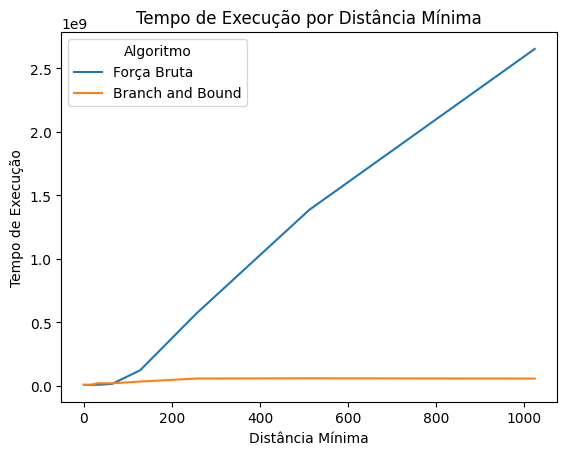

In [41]:
matplotlib.pyplot.figure()
seaborn.lineplot(x="Distância Mínima", y="Tempo de Execução", hue="Algoritmo", data=dados_grafico, style='Algoritmo', dashes=False)
matplotlib.pyplot.title('Tempo de Execução por Distância Mínima')
matplotlib.pyplot.xlabel('Distância Mínima')
matplotlib.pyplot.ylabel('Tempo de Execução')
matplotlib.pyplot.legend(title='Algoritmo')

matplotlib.pyplot.show()

In [42]:
media_algoritmos = {
    'Força Bruta': 0,
    'Branch and Bound': 0
}

for index, row in dados.iterrows():
    if row['Algoritmo'] == 'Força Bruta':
        media_algoritmos['Força Bruta'] += (int(row['Tempo de Execução']))
    else:
        media_algoritmos['Branch and Bound'] += (int(row['Tempo de Execução']))

media_algoritmos['Força Bruta'] = media_algoritmos['Força Bruta'] / 3
media_algoritmos['Branch and Bound'] = media_algoritmos['Branch and Bound'] / 3

In [43]:
media_algoritmos

{'Força Bruta': 4806653531.333333, 'Branch and Bound': 300201168.6666667}

<BarContainer object of 2 artists>

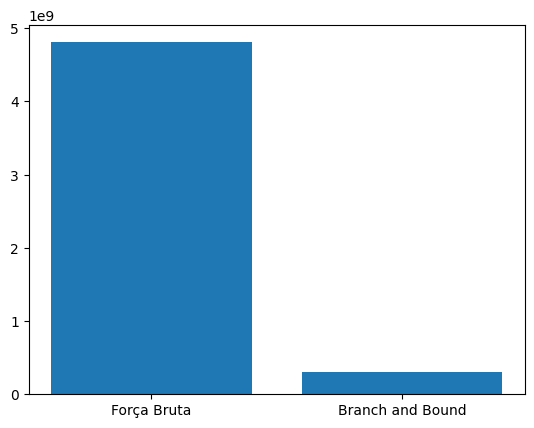

In [44]:
matplotlib.pyplot.figure()
matplotlib.pyplot.bar(media_algoritmos.keys(), media_algoritmos.values())

In [45]:
dados_grafico_numero_lojas = {}

for index, row in dados.iterrows():
    try:
        numero_total_lojas = int(row['Número de Franquias']) * int(row['Número de Lojas por franquia'])
        if not (row['Algoritmo'], numero_total_lojas) in dados_grafico_numero_lojas:
            dados_grafico_numero_lojas.setdefault((row['Algoritmo'], numero_total_lojas), 0)
        else:
            dados_grafico_numero_lojas[(row['Algoritmo'], numero_total_lojas)] += int(row['Tempo de Execução'])
    except:
        pass

dados_grafico_numero_lojas_ = {
    'Algoritmo': [],
    'Número total de lojas': [],
    'Tempo de Execução': []
}

for key, value in dados_grafico_numero_lojas.items():
    algoritmo, numero_total_lojas = key
    tempo_execucao = value / 3
    dados_grafico_numero_lojas_['Algoritmo'].append(algoritmo)
    dados_grafico_numero_lojas_['Número total de lojas'].append(numero_total_lojas)
    dados_grafico_numero_lojas_['Tempo de Execução'].append(tempo_execucao)

dados_grafico_numero_lojas = dados_grafico_numero_lojas_

In [46]:
dados_grafico_numero_lojas

{'Algoritmo': ['Força Bruta',
  'Branch and Bound',
  'Força Bruta',
  'Branch and Bound',
  'Força Bruta',
  'Branch and Bound',
  'Força Bruta',
  'Branch and Bound',
  'Força Bruta',
  'Branch and Bound',
  'Força Bruta',
  'Branch and Bound',
  'Força Bruta',
  'Branch and Bound',
  'Força Bruta',
  'Branch and Bound',
  'Força Bruta',
  'Branch and Bound',
  'Força Bruta',
  'Branch and Bound'],
 'Número total de lojas': [1,
  1,
  2,
  2,
  3,
  3,
  4,
  4,
  5,
  5,
  6,
  6,
  7,
  7,
  8,
  8,
  9,
  9,
  10,
  10],
 'Tempo de Execução': [6272284.0,
  6038010.333333333,
  7240483.333333333,
  7158250.333333333,
  7009630.333333333,
  7654726.333333333,
  2451579684.6666665,
  82975103.66666667,
  11352891.333333334,
  11655561.333333334,
  18681972.666666668,
  15383017.0,
  31188303.333333332,
  17596114.333333332,
  67430995.33333333,
  20920339.666666668,
  278308197.0,
  28771427.0,
  1925543967.3333333,
  100094723.33333333]}

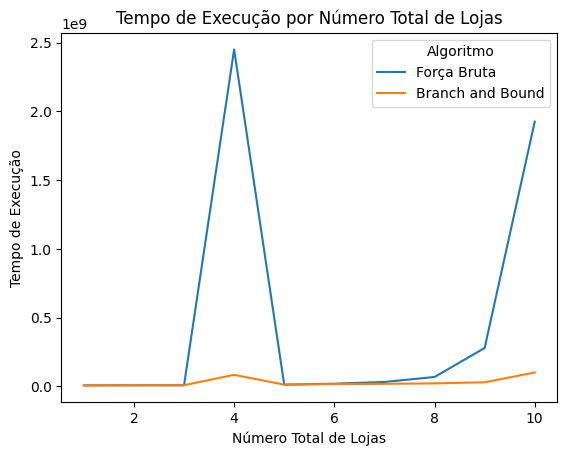

In [48]:
matplotlib.pyplot.figure()
seaborn.lineplot(x="Número total de lojas", y="Tempo de Execução", hue="Algoritmo", data=dados_grafico_numero_lojas, style='Algoritmo', dashes=False)
matplotlib.pyplot.title('Tempo de Execução por Número Total de Lojas')
matplotlib.pyplot.xlabel('Número Total de Lojas')
matplotlib.pyplot.ylabel('Tempo de Execução')
matplotlib.pyplot.legend(title='Algoritmo')
matplotlib.pyplot.show()